In [1]:
%matplotlib inline
import requests
import gzip
import numpy as np
import pandas as pd
import patoolib
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn import metrics
import torchvision.datasets as datasets
from torch.autograd import Variable
from torchvision.transforms import ToTensor
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [3]:
urls=[
        'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
]

In [4]:
from torchvision import datasets
import torchvision.transforms as transforms
import urllib

num_workers = 0
batch_size = 20
basepath = 'data'
transform = transforms.ToTensor()

def set_header_for(url, filename):
    opener = urllib.request.URLopener()
    opener.addheader('User-Agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36')
    opener.retrieve(
    url, f'{basepath}/{filename}')

set_header_for('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
set_header_for('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
set_header_for('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
set_header_for('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=False, transform=transform)

C:\Users\rahma\AppData\Local\Temp\ipykernel_8280\896482923.py:16: DeprecationWarning: URLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  set_header_for('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
C:\Users\rahma\AppData\Local\Temp\ipykernel_8280\896482923.py:17: DeprecationWarning: URLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  set_header_for('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
C:\Users\rahma\AppData\Local\Temp\ipykernel_8280\896482923.py:18: DeprecationWarning: URLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  set_header_for('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
C:\Users\rahma\AppData\Local\Temp\ipykernel_8280\896482923.py:19: DeprecationWarning: URLopener style of invoking requests is deprecated. Use newer ur

In [4]:
# result_train=requests.get(urls[0])
# with open('train_data.gz','wb') as file:
#         file.write(result.content)

# result_train_label=requests.get(urls[1])
# with open('train_label.gz','wb') as file:
#         file.write(result.content)

# result_test=requests.get(urls[2])
# with open('test_data.gz','wb') as file:
#         file.write(result.content)

# result_test_label=requests.get(urls[3])
# with open('test_label.gz','wb') as file:
#         file.write(result.content)

In [5]:
# with gzip.open('train_data.gz','rb') as file:
#       train_feature=np.frombuffer(file.read() ,)


In [6]:
# train_features=patoolib.extract_archive('train_data.gz',outdir='train_feat_unpacked',)

In [7]:
# # download data
# mnist_train = datasets.MNIST(root="/datasets", transform=transforms.ToTensor(), download=True, train=True)
# mnist_test = datasets.MNIST(root="/datasets", transform=transforms.ToTensor(), download=True, train=False)

# # defining the dataloder
# train_loader = DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True)
# test_loader = DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
(train, test) = tf.keras.datasets.mnist.load_data()

In [9]:
# DATASET_SIZE = 70000
# TRAIN_RATIO = 0.5

# VALIDATION_RATIO = 0.25
# TEST_RATIO = 0.25

# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# X = np.concatenate([x_train, x_test])
# y = np.concatenate([y_train, y_test])

In [10]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

In [11]:
# X_train.shape,y_train.shape,X_test.shape,X_val.shape

In [9]:
BATCH_SIZE=100

loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1875896d330>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1875995dae0>}

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [11]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [12]:
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [19]:
criterion= nn.CrossEntropyLoss()
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images  )   # batch x
            b_y = Variable(labels)   # batch y
            
            output = cnn(b_x)[0]     
            pred_y = torch.max(output, 1)[1].data.squeeze()
            accuracy_train= (pred_y == labels).sum().item() / float(labels.size(0))
           
                  
            loss = criterion(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()),(f'Train Accuracy : ={accuracy_train*100}'))
                pass
        
        pass
    
    
    pass
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1091 Train Accuracy : =97.0
Epoch [1/10], Step [200/600], Loss: 0.0744 Train Accuracy : =96.0
Epoch [1/10], Step [300/600], Loss: 0.1429 Train Accuracy : =94.0
Epoch [1/10], Step [400/600], Loss: 0.0872 Train Accuracy : =98.0
Epoch [1/10], Step [500/600], Loss: 0.1435 Train Accuracy : =96.0
Epoch [1/10], Step [600/600], Loss: 0.1637 Train Accuracy : =97.0
Epoch [2/10], Step [100/600], Loss: 0.1267 Train Accuracy : =97.0
Epoch [2/10], Step [200/600], Loss: 0.0659 Train Accuracy : =98.0
Epoch [2/10], Step [300/600], Loss: 0.0983 Train Accuracy : =94.0
Epoch [2/10], Step [400/600], Loss: 0.1269 Train Accuracy : =97.0
Epoch [2/10], Step [500/600], Loss: 0.0399 Train Accuracy : =98.0
Epoch [2/10], Step [600/600], Loss: 0.0326 Train Accuracy : =99.0
Epoch [3/10], Step [100/600], Loss: 0.0589 Train Accuracy : =97.0
Epoch [3/10], Step [200/600], Loss: 0.0272 Train Accuracy : =98.0
Epoch [3/10], Step [300/600], Loss: 0.0444 Train Accuracy : =99.0
Epoch [3/1

In [20]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print(f'Test Accuracy of the model on the 10000 test images: ={accuracy*100}')
    
        pass
test()

Test Accuracy of the model on the 10000 test images: =95.0


In [14]:
##Autoencoder for MNIST data set
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = nn.Sequential(
            # 28 x 28
            nn.Conv2d(1, 4, kernel_size=5),
            # 4 x 24 x 24
            nn.ReLU(True),
            nn.Conv2d(4, 8, kernel_size=5),
            nn.ReLU(True),
            # 8 x 20 x 20 = 3200
            nn.Flatten(),
            nn.Linear(3200, 10),
            
            # 10
            nn.Softmax(),
            )
        self.decoder = nn.Sequential(
            # 10
            nn.Linear(10, 400),
            # 400
            nn.ReLU(True),
            nn.Linear(400, 4000),
            # 4000
            nn.ReLU(True),
            nn.Unflatten(1, (10, 20, 20)),
            # 10 x 20 x 20
            nn.ConvTranspose2d(10, 10, kernel_size=5),
            # 24 x 24
            nn.ConvTranspose2d(10, 1, kernel_size=5),
            # 28 x 28
            nn.Sigmoid(),
            )
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return dec

model_ae=Autoencoder()
print(model_ae)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=3200, out_features=10, bias=True)
    (6): Softmax(dim=None)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=4000, bias=True)
    (3): ReLU(inplace=True)
    (4): Unflatten(dim=1, unflattened_size=(10, 20, 20))
    (5): ConvTranspose2d(10, 10, kernel_size=(5, 5), stride=(1, 1))
    (6): ConvTranspose2d(10, 1, kernel_size=(5, 5), stride=(1, 1))
    (7): Sigmoid()
  )
)


In [16]:
distance = nn.MSELoss()
optimizer = torch.optim.SGD(model_ae.parameters(), lr=0.01, momentum=0.5)
num_epochs=20
losses=[]
for epoch in range(num_epochs):
    for data in loaders['train']:
        img, _ = data
        img = Variable(img).cpu()
        output = model_ae(img)
        loss = distance(output, img)
        losses.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch [{}/{}], loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

C:\Users\rahma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch [1/20], loss: 0.1041
epoch [2/20], loss: 0.0979
epoch [3/20], loss: 0.0828
epoch [4/20], loss: 0.0768
epoch [5/20], loss: 0.0732
epoch [6/20], loss: 0.0721
epoch [7/20], loss: 0.0705
epoch [8/20], loss: 0.0717
epoch [9/20], loss: 0.0711
epoch [10/20], loss: 0.0709
epoch [11/20], loss: 0.0690
epoch [12/20], loss: 0.0666
epoch [13/20], loss: 0.0687
epoch [14/20], loss: 0.0682
epoch [15/20], loss: 0.0672
epoch [16/20], loss: 0.0687
epoch [17/20], loss: 0.0701
epoch [18/20], loss: 0.0661
epoch [19/20], loss: 0.0698
epoch [20/20], loss: 0.0668


In [ ]:
# tensor_trainning_loss = torch.tensor(loss, requires_grad=False)
plt.plot(np.linspace(1,20,num=20),losses)
plt.xlabel("epoch")
plt.ylabel("train loss")
plt.title(f'train loss vs epoch at learning rate={learning_rate} , batch size={batch_size_train} and Neurons={neuron_list}' )
# plt.yticks(np.linspace(170,200,10))
plt.show
## plotting trainning error

In [19]:
confusion_matrix = np.zeros((10, 10))
actual_ae=[]
predicted_ae=[]
for data in loaders['test']:
    img, labels = data[0], data[1]
    imgs = Variable(img)
    encs = model_ae.encoder(imgs).detach().numpy()
    for i in range(len(encs)):
        predicted = np.argmax(encs[i])
        predicted_ae.append(predicted)
        actual = labels[i]
        actual_ae.append(actual)
        confusion_matrix[actual][predicted] += 1
       


C:\Users\rahma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [20]:
report_trainning=metrics.confusion_matrix(actual_ae,predicted_ae) # due to batching we need to make this the input to confusion matrix
# sklearn.metrics.confusion_matrix
report_trainning
cm_df_trainning = pd.DataFrame(report_trainning,
                     index = ['0','1','2','3','4','5','6','7','8','9'], #,labels=["0", "1", "2","3", "4", "5","6", "7", "8","9"]
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
cm_df_trainning

# metrics.accuracy_score(actual_ae,predicted_ae)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,1,979,0,0,0,0
1,44,0,0,0,0,1091,0,0,0,0
2,0,0,0,0,0,1032,0,0,0,0
3,0,0,0,0,0,1010,0,0,0,0
4,0,0,0,0,0,982,0,0,0,0
5,0,0,0,0,0,892,0,0,0,0
6,0,0,0,0,0,958,0,0,0,0
7,0,0,0,0,0,1028,0,0,0,0
8,0,0,0,0,0,974,0,0,0,0
9,0,0,0,0,0,1009,0,0,0,0


In [21]:
metrics.accuracy_score(actual_ae,predicted_ae)

0.0892

In [22]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
         
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [41]:

# Model Initialization
model = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-8)

In [42]:
epochs = 20
outputs = []
losses = []
actual_ae_fcc=[]
predicted_ae_fcc=[]
for epoch in range(epochs):
    total_step = len(loaders['train'])
    for i,(image, _) in enumerate(loaders['train']):
       
      # Reshaping the image to (-1, 784)
      image = image.reshape(-1, 28*28)
      actual_ae_fcc.append(image)
       
      # Output of Autoencoder
      reconstructed = model(image)
      ## printing last image predicted
      predicted_ae_fcc.append(reconstructed)

      
       
      # Calculating the loss function
      loss = loss_function(reconstructed, image)
       
      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
       
      # Storing the losses in a list for plotting
      
    outputs.append((epochs, image, reconstructed))
    if (i+1) % 100 == 0:
                losses.append(loss)
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, epochs, i + 1, total_step, loss.item()))
                


Epoch [1/20], Step [600/600], Loss: 0.0465
Epoch [2/20], Step [600/600], Loss: 0.0409
Epoch [3/20], Step [600/600], Loss: 0.0336
Epoch [4/20], Step [600/600], Loss: 0.0332
Epoch [5/20], Step [600/600], Loss: 0.0304
Epoch [6/20], Step [600/600], Loss: 0.0299
Epoch [7/20], Step [600/600], Loss: 0.0312
Epoch [8/20], Step [600/600], Loss: 0.0263
Epoch [9/20], Step [600/600], Loss: 0.0260
Epoch [10/20], Step [600/600], Loss: 0.0260
Epoch [11/20], Step [600/600], Loss: 0.0245
Epoch [12/20], Step [600/600], Loss: 0.0264
Epoch [13/20], Step [600/600], Loss: 0.0263
Epoch [14/20], Step [600/600], Loss: 0.0246
Epoch [15/20], Step [600/600], Loss: 0.0225
Epoch [16/20], Step [600/600], Loss: 0.0262
Epoch [17/20], Step [600/600], Loss: 0.0287
Epoch [18/20], Step [600/600], Loss: 0.0226
Epoch [19/20], Step [600/600], Loss: 0.0228
Epoch [20/20], Step [600/600], Loss: 0.0231


<function matplotlib.pyplot.show(close=None, block=None)>

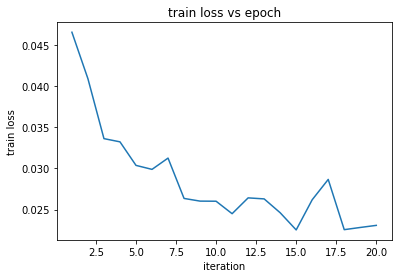

In [43]:
# tensor_trainning_loss = torch.tensor(loss, requires_grad=False)
plt.plot(np.linspace(1,20,num=20),torch.tensor(losses, requires_grad=False))
plt.xlabel("iteration")
plt.ylabel("train loss")
plt.title(f'train loss vs epoch' )
# plt.yticks(np.linspace(170,200,10))
plt.show
## plotting trainning error

In [44]:
actual_ae_fcc=[]
predicted_ae_fcc=[]
for data in loaders['test']:
    img, labels = data[0], data[1]
    image = img.reshape(-1, 28*28)
    # imgs = Variable(img)
    encs = model.encoder(image).detach().numpy()
    for i in range(len(encs)):
        predicted = np.argmax(encs[i])
        predicted_ae_fcc.append(predicted)
        actual = labels[i]
        actual_ae_fcc.append(actual)
      

In [45]:
report_trainning=metrics.confusion_matrix(actual_ae_fcc,torch.tensor(predicted_ae_fcc, requires_grad=False)) # due to batching we need to make this the input to confusion matrix
# sklearn.metrics.confusion_matrix
report_trainning
cm_df_trainning = pd.DataFrame(report_trainning,
                     index = ['0','1','2','3','4','5','6','7','8','9'], #,labels=["0", "1", "2","3", "4", "5","6", "7", "8","9"]
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
cm_df_trainning

# metrics.accuracy_score(actual_ae,predicted_ae)

,0,1,2,3,4,5,6,7,8,9
0,0,259,0,0,1,710,10,0,0,0
1,0,1127,0,0,8,0,0,0,0,0
2,0,1003,0,0,1,27,0,1,0,0
3,0,949,0,0,23,38,0,0,0,0
4,0,848,0,0,34,2,98,0,0,0
5,0,858,0,0,7,22,5,0,0,0
6,53,449,0,2,183,233,31,7,0,0
7,0,1007,0,0,2,0,19,0,0,0
8,0,961,0,0,9,3,1,0,0,0
9,0,986,0,0,5,1,17,0,0,0


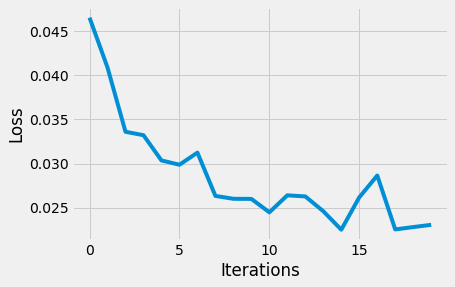

In [46]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
# tensor_trainning_loss = torch.tensor(losses, requires_grad=False)
 
# Plotting the last 100 values
plt.plot(torch.tensor(losses, requires_grad=False)[-100:].detach().numpy())

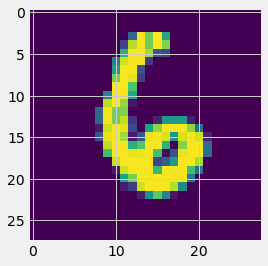

In [47]:
## printing last image actual
for i, item in enumerate(image):
   
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])
 


C:\Users\rahma\AppData\Local\Temp\ipykernel_8280\2421502944.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(item[0], requires_grad=False))


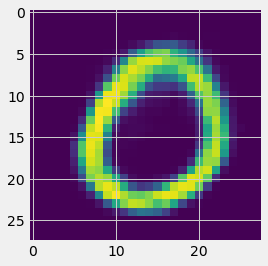

In [48]:
## printing last image predicted

for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(torch.tensor(item[0], requires_grad=False))